# $\chi^2$-Anpassungstest

... ein parameterfreier Test zum Prüfen ob eine Stichporbe zu einer gegebenen Verteilung passt.


Bei der Durchführung des Tests halten wir uns and die bekannte [Vorgehenweise](sec:vorgehensweise.test). Im Folgenden werden die  zugehörigen konkreten Hypothesen, Testgrößen, kritischen Bereiche und p-Werte besprochen.


## Stetiger Fall

Anhand einer Stichprobe $X_1,\dots, X_n$ soll eine Annahme über die unbekannte Verteilungsfunktion $F$ eines **stetigen** Merkmals $X$ überprüft werden (z. B. $X$ ist normalverteilt).

### Gegeben / Vorbereitungen:

- Stichprobe der Größe $n$:
  - mathematische Stichprobe: $X_1, \dots, X_n$
  - konkrete Stichprobe: $x_1, \dots, x_n$

- Vermutete Verteilungsfunktion $F_0$  
  (ggf. mit **$m$ geschätzten Parametern**)

- Einteilung der reellen Achse in $k$ Klassen (Intervalle):

  $$
  K_j = (a_j, a_{j+1}], \quad j = 1, \dots, k, \quad \text{mit } a_1 = -\infty,\, a_{k+1} = \infty
  $$

- Wahrscheinlichkeiten unter $F_0$:  

  $$
  p_j := \mathbb{P}_0(X \in K_j) = F_0(a_{j+1}) - F_0(a_j)
  $$

- Beobachtete Häufigkeiten:  
  $H_j$ = Anzahl der Stichprobenwerte $X_i$, die in $K_j$ fallen



### Testschritte

1. **Signifikanzniveau wählen:**  $\alpha \in (0,1)$

2. **Hypothesen formulieren:**  $ H_0: F = F_0 \quad \text{vs.} \quad H_1: F \ne F_0$  
   (Dabei darf $F_0$ geschätzte Parameter enthalten; Anzahl: $m$)

3. **Testgröße:**

   $$
   T = \sum_{j=1}^k \frac{(H_j - n p_j)^2}{n p_j}
   $$

   Unter der Nullhypothese gilt:

   $$
   T \stackrel{a}{\sim} \chi^2(k - m - 1)
   $$

   In Worten: T ist asymptotisch $\chi^2$-verteilt mit Parameter $k-m-1$

   Hierbei ist:

   - $n$: Stichprobengröße  
   - $k$: Anzahl der Klassen  
   - $m$: Anzahl der geschätzten Parameter

   **Konkreter Testwert:**

   $$
   t = \sum_{j=1}^k \frac{(h_j - n p_j)^2}{n p_j}
   $$

   wobei $h_j$ die Anzahl der Werte der **konkreten** Stichprobe im Intervall $K_j=(a_j,a_{j+1}]$ ist

5. **Kritischer Bereich:**

   Der kritische Bereich $K$ ist so gewählt, dass:

   $$
   \mathbb{P}_0(T \in K) \leq \alpha
   $$

   Setze also:

   $$
   K = \left( \chi^2_{k - m - 1,\; 1 - \alpha},\; \infty \right)
   $$

6. **Entscheidungsregel:**

   - **Falls** $t \in K$:  
     Nullhypothese $H_0$ wird **abgelehnt**  
     &rarr; Der Test ist **signifikant**

   - **Falls** $t \notin K$:  
     Keine ausreichenden Hinweise gegen $H_0$  
     &rarr; Der Test ist **nicht signifikant**


### Bemerkungen zum $\chi^2$-Anpassungstest

- Die Verteilungsfunktion $F_0$ ist eine zuvor festgelegte, vollständig bekannte Verteilungsfunktion (bis auf evtl zu schätzende Parameter).  
    
  Die Anzahl der geschätzten Parameter ist $m$.

- Die Testgröße

  $$
  T =  \sum_{j=1}^k \frac{(\mathbf{H}_j - n p_j)^2}{n p_j} \stackrel{a}{\sim} \chi^2(k - m - 1)
  $$  

  ist **„groß“**, wenn die beobachteten Häufigkeiten $H_j$ stark von den theoretischen Häufigkeiten $n p_j$ abweichen.  
  Daher liegt der kritische Bereich **rechts**:

  $$
  K = \left( \chi^2_{k - 1 - m,\; 1 - \alpha},\; \infty \right)
  $$

  **Große Werte von $T$ sprechen gegen die Nullhypothese.**

- Die Teststatistik $T$ ist **asymptotisch** $\chi^2$-verteilt.  
  Wir nutzen die folgende **Faustregel** für die Anwendbarkeit des Verfahrens:

  $$
  \boxed{n p_j \geq 5 \qquad \text{für alle}\quad j = 1, \dots, k}
  $$

- Eventuell unbekannte Parameter sind nach dem **Maximum-Likelihood-Prinzip** zu schätzen. Da wir dieses Verfahren hier nicht behandeln, geben wir bei Aufgaben im Rahmen der Vorlesung die passenden Schätzfunktionen mit an.

### Berechnung des p-Werts

- Der **p-Wert** ist die Wahrscheinlichkeit, unter der Nullhypothese $H_0$ einen Testwert, welcher mindestens so extrem ist wie der beobachtete Wert $t$, zu erhalten:

  $$
  \text{p-Wert} = \mathbb P_0(T \geq t) = 1 - F_{\chi^2(k - m - 1)}(t)
  $$

- In **R** kann der p-Wert mit der Funktion `pchisq()` berechnet werden:

  ```R
  
  pchisq(t, df = k - m - 1, lower.tail = FALSE)

  ```
  oder

  ```R
  
  1 - pchisq(t, df = k - m - 1)

  ```

  Dabei ist:
  - `t` der beobachtete Testwert,
  - `df = k - m - 1` die Anzahl der Freiheitsgrade,
  - `lower.tail = FALSE` oder `1 - ...`, weil der kritische Bereich rechts liegt.







## Diskreter Fall

Anhand einer Stichprobe $X_1,\dots,X_n$ soll eine Annahme über die unbekannte Verteilungsfunktion $F$ (nicht nur Parameter unbekannt) des **diskreten** Merkmals $X$ überprüft werden. Beispielsweise:

- man möchte man wissen, ob ein Merkmal $X$ auf $\{1,2,3,4\}$ gleichverteilt ist; oder
- man möchte wissen, ob $X$ auf $\{1,2,\dots, N\}$ gleichverteilt ist.

Im zweiten Fall muss $N$ zunächst geschätzt werden. Dann wird im Test mit dem Schätzwert für $N$ gearbeitet und es wird einbezogen, dass $m=1$ Parameter geschätzt wurde.

### Gegeben / Vorbereitungen:

- Stichprobe der Größe $n$:
  - mathematische Stichprobe: $X_1, \dots, X_n$  
  - konkrete Stichprobe: $x_1, \dots, x_n$

- vermutete Verteilungsfunktion $F_0$ (mit $m$ geschätzten Parametern) und zugehörige Verteilungstabelle:

  | Wert            | $x_1$ | $x_2$ | ... | $x_k$ |
  |------------------|-------|-------|------|-------|
  | Wahrscheinlichkeit | $p_1$ | $p_2$ | ... | $p_k$ |

- $H_j$ ... Anzahl der Stichprobenwerte $X_i$ mit Wert $x_j$

**Beachte:**

- Das Vorgehenist fast wie im stetigen Fall, aber die Klassen sind hier **einelementig**.  
- Wieder ist zu überprüfen, ob $np_j \geq 5$ für alle $j = 1, \dots, k$ gilt.  
  Falls dies **nicht** der Fall ist und $X$ **ordinal messbar** ist, so kann man benachbarte Elemente zu Klassen zusammenfassen, damit die Faustregel erfüllt wird.


### Testschritte

1. **Wahl des Signifikanzniveaus** $\alpha \in (0, 1)$

2. **Aufstellen einer (Null-)Hypothese**  
   $H_0: F = F_0$, $H_1: F \neq F_0$  
   *(Die vermutete Verteilung $F_0$ darf geschätzte Parameter enthalten, Anzahl $m$.)*

3. **Testgröße** $T$ mit bekannter Verteilung unter $H_0$:

   $$
   T  = \sum_{j=1}^k \frac{(H_j - n p_j)^2}{n p_j} \stackrel{a}{\sim} \chi^2(k - m - 1)
   $$

   Der **konkrete Testwert** $t$ wird auf Basis der konkreten Stichprobe $x_1, \dots, x_n$ berechnet.

4. **Kritischer Bereich** $K$ mit der Eigenschaft $\mathbb{P}_0(T \in K) \leq \alpha$.  
   Dafür setzen wir:

   $$
   K := \left( \chi^2_{k - m - 1, 1 - \alpha}, \infty \right)
   $$

5. **Entscheidungsregel**:

   - **Fall $t \in K$**: Ablehnung der Nullhypothese $H_0$  
     &rarr; Der Test ist **signifikant**

   - **Fall $t \notin K$**: Auf Basis des Tests ist nichts gegen $H_0$ einzuwenden  
     &rarr; Der Test ist **nicht signifikant**



### Berechnung des p-Werts

- Der **p-Wert** ist die Wahrscheinlichkeit, unter der Nullhypothese $H_0$ einen Testwert zu erhalten, welcher mindestens so extrem wie der beobachtete Wert $t$:

  $$
  \text{p-Wert} = \mathbb{P}_0(T \geq t) = 1 - F_{\chi^2(k - m - 1)}(t)
  $$


- In **R** kann der p-Wert mit der Funktion `pchisq()` berechnet werden:

  ```R
  
  pchisq(t, df = k - m - 1, lower.tail = FALSE)

  ```
  oder

  ```R
  
  1 - pchisq(t, df = k - m - 1)

  ```

  Dabei ist:
  - `t` der beobachtete Testwert,
  - `df = k - m - 1` die Anzahl der Freiheitsgrade,
  - `lower.tail = FALSE` oder `1 - ...`, weil der kritische Bereich rechts liegt.


## Beispiele

### Beispiel: Stetiger Fall

Bei 100 Bauelementen der gleichen Art wurde die Lebensdauer überprüft. Eine statistische Auswertung ergab:

1. $\bar{x} = 1203.1$ [h], $s = 614.9$ [h]  
2. Häufigkeitstabelle und Histogramm

| Klasse         | Anzahl |
|----------------|--------|
| $[0,500]$      | 11     |
| $(500,1000]$   | 29     |
| $(1000,1500]$  | 27     |
| $(1500,2000]$  | 23     |
| $(2000,2500]$  | 7      |
| $(2500,3000]$  | 2      |
| $(3000,3500]$  | 0      |
| $(3500,4000]$  | 1      |



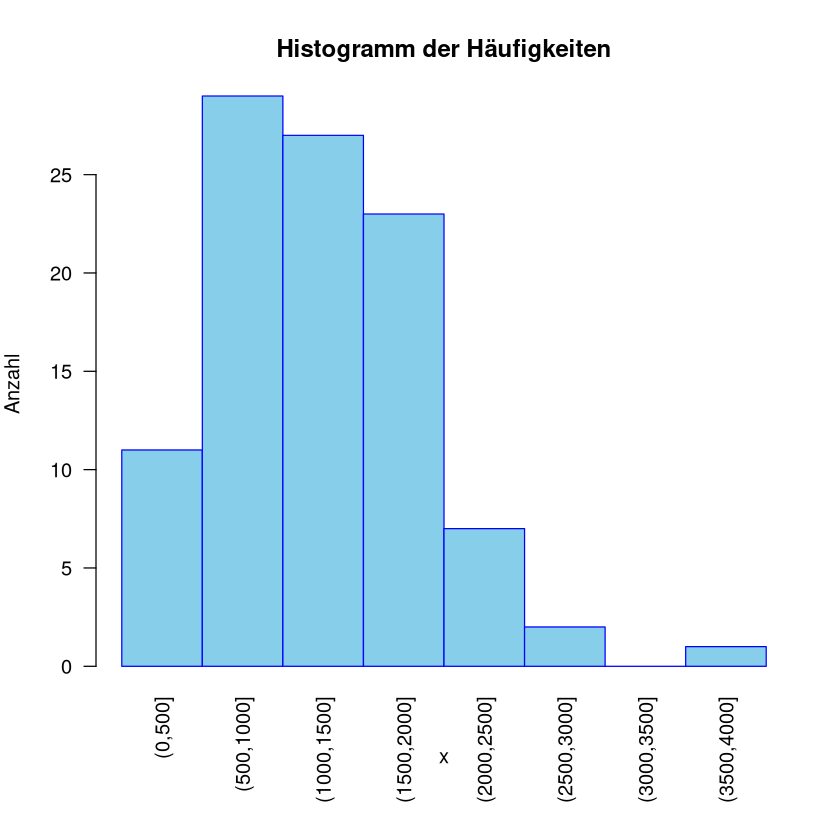

In [19]:
# Klassenuntergrenzen und -obergrenzen
breaks <- c(0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000)

# Häufigkeiten pro Klasse
counts <- c(11, 29, 27, 23, 7, 2, 0, 1)

# Klassenbezeichnungen
class_labels <- paste0("(", head(breaks, -1), ",", tail(breaks, -1), "]")

# Layout anpassen: mehr Platz unten (mar = c(unten, links, oben, rechts))
par(mar = c(7, 4, 4, 2))  # Standard ist c(5,4,4,2)

# Balkendiagramm zeichnen
barplot(height = counts,
        names.arg = class_labels,
        space = 0,
        col = "skyblue",
        xlab = "x",
        ylab = "Anzahl",
        main = "Histogramm der Häufigkeiten",
        border = "blue",
        las = 2)  # las = 2 -> senkrechte Beschriftung der Klassen



Es ist mit einem Signifikanzniveau von $0.05$ zu überprüfen, ob das Merkmal $X$ als exponentialverteilt angesehen werden kann.

*Hinweis:* Der ML-Schätzer für $\lambda$ ist $\hat{\lambda} = \frac{1}{\bar{x}}$.

---

#### Lösung 

1. **Signifikanzniveau:** $\alpha = 0.05$

2. **Hypothesen:**

   $$
   H_0: F = F_0 \quad \text{mit} \quad
   F_0(x) = \begin{cases}
   1 - \exp(-\lambda x), & x \geq 0 \\
   0, & \text{sonst}
   \end{cases}
   $$

   Also $X \sim \mathrm{Exp}(\lambda)$.

   Der ML-Schätzer ist $\hat\lambda = \frac{1}{1203.1} = 8.312 \cdot 10^{-4}$.

3. **Testgröße:**

   | $j$ | $K_j = [a_j, a_{j+1})$  | $F_0(a_j)$ | $p_j = F_0(a_{j+1}) - F_0(a_j)$ | $n p_j$ | $h_j$ |
   |-------|---------------------------|--------------|------------------------------------|----------|---------|
   | 1     | $[0,500]$               | 0            | 0.340                              | 34.0     | 11      |
   | 2     | $(500,1000]$            | 0.340        | 0.224                              | 22.4     | 29      |
   | 3     | $(1000,1500]$           | 0.564        | 0.149                              | 14.9     | 27      |
   | 4     | $(1500,2000]$           | 0.713        | 0.097                              | 9.7      | 23      |
   | 5     | $(2000,2500]$           | 0.810        | 0.065                              | 6.5      | 7       |
   | 6     | $(2500,3000]$           | 0.875        | 0.042                              | **4.2**  | 2       |
   | 7     | $(3000,3500]$           | 0.917        | 0.028                              | **2.8**  | 0       |
   | 8     | $(3500, \infty)$        | 0.945        | 0.055                              | 5.5      | 1       |

   ***Achtung:** Bedingung $n p_j \geq 5$ verletzt!*

   &rarr; Fasse Zeilen $j=6$ und $j=7$ zusammen.

   Neue Tabelle:

   | $j$ | $K_j = [a_j, a_{j+1})$  | $F_0(a_j)$ | $p_j = F_0(a_{j+1}) - F_0(a_j)$ | $n p_j$ | $h_j$ |
   |-------|---------------------------|--------------|------------------------------------|----------|---------|
   | 1     | $[0,500]$               | 0            | 0.340                              | 34.0     | 11      |
   | 2     | $(500,1000]$            | 0.340        | 0.224                              | 22.4     | 29      |
   | 3     | $(1000,1500]$           | 0.564        | 0.149                              | 14.9     | 27      |
   | 4     | $(1500,2000]$           | 0.713        | 0.097                              | 9.7      | 23      |
   | 5     | $(2000,2500]$           | 0.810        | 0.065                              | 6.5      | 7       |
   | **6** | **$(2500,3500]$**       | **0.875**    | **0.070**                         | **7.0**  | **2**   |
   | 7     | $(3500, \infty)$        | 0.945        | 0.055                              | 5.5      | 1       |

   Testgröße lautet daher:

   $$
   T = \sum_{j=1}^7 \frac{(H_j - n p_j)^2}{n p_j} \stackrel{a}{\sim} \chi^2(7 - 1 - 1)
   \quad \text{falls } H_0 \text{ wahr ist}
   $$

   Konkreter Wert der Testgröße $t$:

   $$
   t = \sum_{j=1}^7 \frac{(h_j - n p_j)^2}{n p_j} = \frac{(11-34.0)^2}{34.0} + \frac{(29-22.4)^2}{22.4} + \dots + \frac{(1-5.5)^2}{5.5} = 52.9 
   $$


4. **Kritischer Bereich:**

   $$
   K = (\chi^2_{5,0.95}, \infty) = (11.07, \infty)
   $$

5. **Testentscheidung:**

   $$
   t \in K \qquad\Rightarrow \qquad H_0 \text{ wird abgelehnt }
   $$

6. **Interpretation:**

   *Die Hypothese, dass die Lebensdauer der Bauelemente exponentialverteilt ist, ist (bei einem Signifikanzniveau von 0.05) zu verwerfen.*



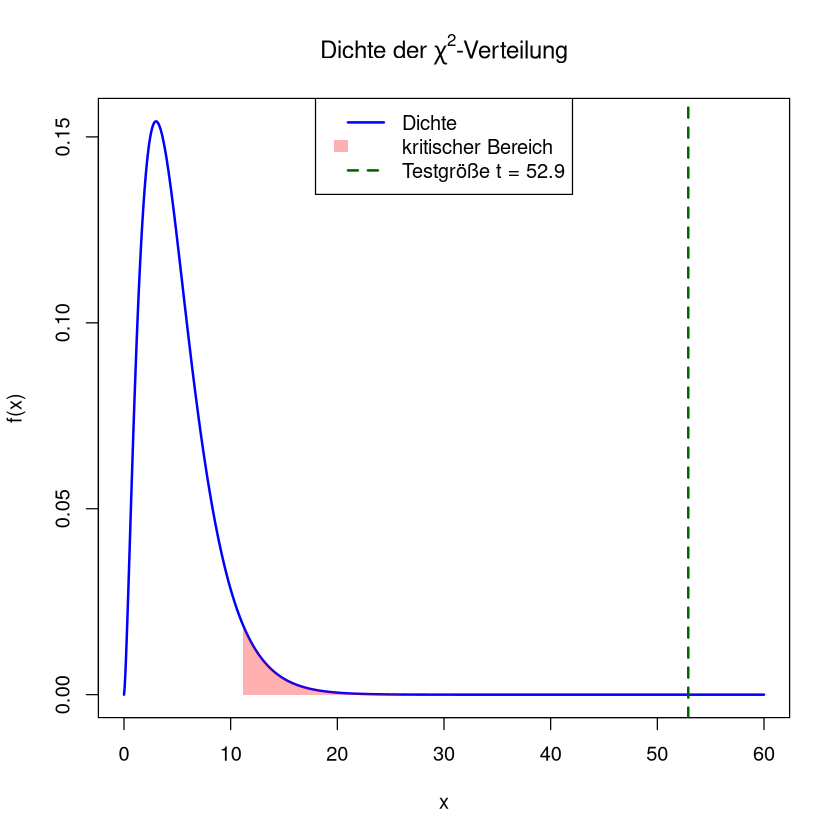

In [20]:
# Parameter
df       <- 5       # Freiheitsgrade 
t        <- 52.9    # Testgröße
kritisch <- 11.07   # Beginn des kritischen Bereichs

# x-Werte für die Dichte
x <- seq(0, max(t, 60), length.out = 1000)

# Dichte der Chi-Quadrat-Verteilung
y <- dchisq(x, df)

# Plot
plot(x, y, type = "l", lwd = 2, col = "blue",
     xlab = "x", ylab = "f(x)",
     main = expression(paste("Dichte der ", chi^2, "-Verteilung")))

# Kritischen Bereich einfärben
polygon(c(x[x >= kritisch], rev(x[x >= kritisch])),
        c(y[x >= kritisch], rep(0, sum(x >= kritisch))),
        col = rgb(1, 0, 0, 0.3), border = NA)

# Testgröße als vertikale Linie
abline(v = t, col = "darkgreen", lwd = 2, lty = 2)

# Legende
legend("top", legend = c("Dichte", "kritischer Bereich", "Testgröße t = 52.9"),
       col = c("blue", rgb(1, 0, 0, 0.3), "darkgreen"),
       lwd = c(2, NA, 2), lty = c(1, NA, 2),
       fill = c(NA, rgb(1, 0, 0, 0.3), NA),
       border = c(NA, NA, NA))


#### Bemerkungen zum Beispiel

- Das Histogramm passt auch **optisch nicht so gut** zur **Dichte der Exponentialverteilung** (rote Funktion).

- Anders sieht das mit der **Dichte der Rayleigh-Verteilung** (grüne Funktion) aus, siehe zum Beispiel [Wikipedia](https://de.wikipedia.org/wiki/Rayleigh-Verteilung)

- Führt man den $\chi^2$-Anpassungstest mit der Rayleigh-Verteilung aus, so wird die Nullhypothese **nicht abgelehnt**.

- Beachte: Die Exponentialverteilung und die Rayleigh-Verteilung sind beides Spezialfälle der Weibull-Verteilung (mit Parameter $k=1$ bzw. $k=2$), siehe zum Beispiel [Wikipedia](https://de.wikipedia.org/wiki/Weibull-Verteilung)


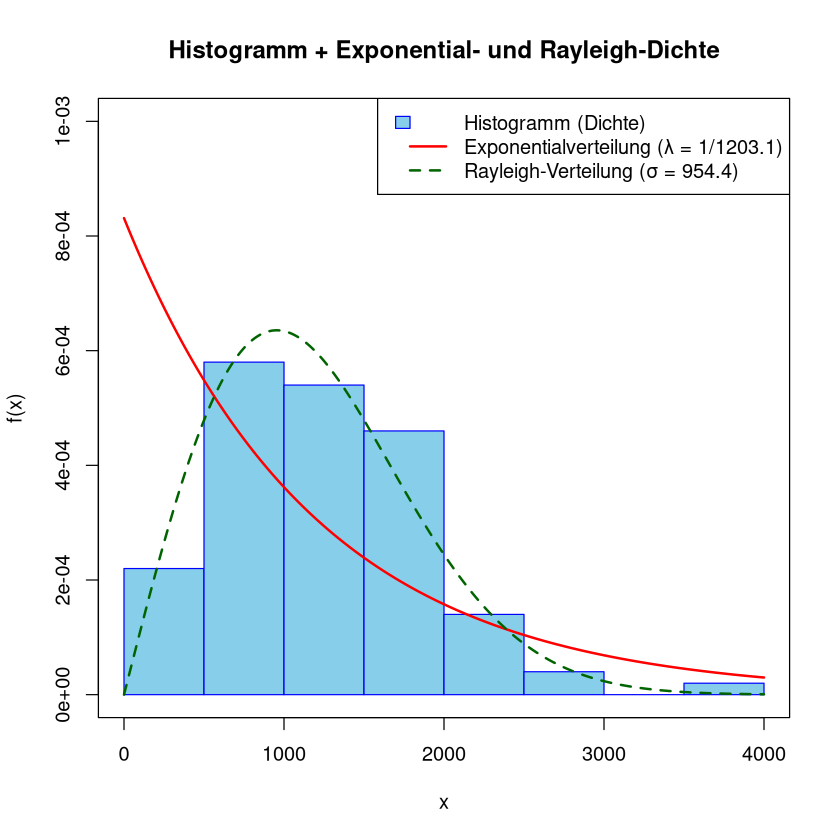

In [21]:
#  Gegeben ist:
n      <- 100            # Stichprobengroesse
barx   <- 1203.1         # Mittelwert
s      <- 614.9          # emp. Stdabw

# Lambda fuer Exp-Vert. schaetzen
lambda <- 1/1203.1       # gesch. lambda fuer Exp-vert

# ML-Schaetzwert fuer Rayleigh-Verteilung aus barx und s
ssq    <- (n-1)*(s^2+n/(n-1) * barx^2)  # sum of squares, sum x_i^2
sigma  <- sqrt(1/(2*n) *ssq )           # gesch. Parameter Rayleigh   

# Klassenuntergrenzen und -obergrenzen
breaks <- c(0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000)

# Häufigkeiten
counts <- c(11, 29, 27, 23, 7, 2, 0, 1)

# Klassenbreiten
widths <- diff(breaks)

# Dichte = rel.Häufigkeit / Klassenbreite
densities <- counts / widths /100

# Leeres Plot-Fenster vorbereiten (mit y-Achse für Dichte)
plot(NA, xlim = c(0, 4000), ylim = c(0, max(densities, 0.001)),
     xlab = "x", ylab = "f(x)",
     main = "Histogramm + Exponential- und Rayleigh-Dichte")

# Histogramm zeichnen
for (i in 1:length(densities)) {
  rect(xleft = breaks[i],
       xright = breaks[i + 1],
       ybottom = 0,
       ytop = densities[i],
       col = "skyblue",
       border = "blue")
}

# x-Werte für Dichtefunktionen
xvals <- seq(0, 4000, length.out = 1000)

# Exponentialverteilung: lambda = 1 / Mittelwert
exp_density <- dexp(xvals, rate = lambda)
lines(xvals, exp_density, col = "red", lwd = 2)

# Rayleigh-Verteilung: sigma = geschaetzt, siehe oben
rayleigh_density <- (xvals / sigma^2) * exp(-(xvals^2) / (2 * sigma^2))
lines(xvals, rayleigh_density, col = "darkgreen", lwd = 2, lty = 2)

# Legende
legend("topright",
       legend = c("Histogramm (Dichte)", 
                  "Exponentialverteilung (λ = 1/1203.1)",
                  "Rayleigh-Verteilung (σ = 954.4)"),
       fill = c("skyblue", NA, NA),
       border = c("blue", NA, NA),
       lty = c(NA, 1, 2),
       lwd = c(NA, 2, 2),
       col = c("skyblue", "red", "darkgreen"))


### Beispiel: Diskreter Fall

Um besser planen zu können, soll in einem Call-Center die Verteilung der Anrufe untersucht werden.  
Eine Stichprobe von 100 Intervallen zu je 3 Minuten ergab:

| Anzahl der Anrufe                   | 0  | 1   | 2   | 3   | 4   | $\geq$ 5  |
|-----------------------------------|----|-----|-----|-----|-----|------|
| Häufigkeit der Intervalle mit dieser Anzahl an Anrufen | 7  | 14  | 20  | 18  | 26  | 15   |
| $n \cdot p_j$ (unter Annahme Poissonverteilung)    | 5.03 | 15.04 | 22.48 | 22.40 | 16.75 | 18.30 |

Im Mittel riefen 2.99 Personen pro Intervall an.

Führen Sie einen Test mit der Nullhypothese  
**„die Anzahl der Anrufe in einem 3-Minuten-Intervall ist poissonverteilt“**  
zum Signifikanzniveau 0.05 durch.

**Hinweis:** ML-Schätzung des Parameters der Poissonverteilung: $\hat{\lambda} = \bar{x}$

---

#### Lösung

- $F$ ... tatsächliche Verteilungsfunktion  
- $F_0$ ... Verteilungsfunktion der Poissonverteilung mit $\lambda = \bar{x} = 2.99$

Berechne für $X$ (falls es mit $F_0$ verteilt ist):  

$$
p_1 = \mathbb P(X=0), \quad \dots \quad, p_5 = \mathbb P(X=4), \quad p_6 = \mathbb P(X \geq 5)
$$

---

**Durchführung des Tests**

1. Signifikanzniveau: $\alpha = 0.05$  
2. Hypothesen:  

   $$
   H_0: F = F_0, \qquad H_1: F \neq F_0
   $$
   
3. Testgröße:  

   $$
   T = \sum_{j=1}^6 \frac{(H_j - n p_j)^2}{n p_j}
   $$
     
   Konkreter Wert der Testgröße:  

   $$
   t = \frac{(7 - 5.03)^2}{5.03} + \dots + \frac{(15 - 18.3)^2}{18.3} = 7.684637
   $$

4. Kritischer Bereich:  

   $$
   K = \left(\chi^2_{6-1-1, 0.95}, \infty\right) = (9.4877, \infty)
   $$

5. Testentscheidung:  

   $$
   t \notin K \implies H_0 \text{ wird nicht verworfen}
   $$

6. Interpretation:  
   Die Hypothese, dass die Daten poissonverteilt sind, ist (bei einem Signifikanzniveau von 0.05) **nicht zu verwerfen**.  
   Die vorliegenden Daten sprechen nicht gegen die Poissonverteilung.


#### Bemerkung zum Beispiel

Mit dem Test wurde **nicht** gezeigt, dass die Daten tatsächlich poissonverteilt sind! 

Die Daten sprechen nur nicht so stark gegen die Poissonverteilung, dass wir sie (zu $\alpha=0.05$) ablehnen müssen.

## Umsetzung mit `chisq.test`

Besonders schnell lässt sich dieser Test in R umsetzen, wenn man die Funktion `chisq.test` nutzt. 

Man benötigt dafür:

- Einen Vektor mit den beobachteten Häufigkeiten.
- Optional: Einen Vektor mit den erwarteten Häufigkeiten oder Wahrscheinlichkeiten. Fehlt dieser, wird gegen die Gleichverteilung getestet.

```R

chisq.test(x = beobachtet, p = erwartete_Wahrscheinlichkeiten)

```

Hier muss in `beobachtet` der Vektor der beobachteten Häufigkeiten stehen. Der Vektor `erwartete_Wahrscheinlichkeiten` enthält die, wie der Name schon sagt, die erwarteten Wahrscheinlichkeiten für die verschiedenen Klassen. Die getestestete Nullhypothese ist also: Die wahren Wahrscheinlichkeiten sind die in `erwartete_Wahrscheinlichkeiten`.

Schreibt man

```R

chisq.test(beobachtet)

```

So wird gegen die Gleichverteilung getestet, d.h. $H_0:$ das Merkmal ist gleichverteilt; $H_1:$ das Merkmal ist nicht gleichverteilt

### Beispiel 1

Wollen wir den p-Wert für das Beispiel zum stetigen Fall berechnen, so ist folgendes einzugeben


In [16]:
# beobachtete Häufigkeiten
beob <- c(11, 29, 27, 23, 7, 2, 1)

# erwaretete Wahrscheinlichkeiten
prob <- c(0.340, 0.224, 0.149, 0.097, 0.065, 0.070, 0.055)  

# Berechnung von Testgroesse und p-Wert
chisq.test(x=beob, p=prob)



	Chi-squared test for given probabilities

data:  beob
X-squared = 52.857, df = 6, p-value = 1.253e-09


Der p-Wert ist kleiner als 0.05 (das Signifikanzniveau des Beispeils), daher lehnen wir die Nullhypothese, dass die Daten exponentialverteilt sind ab.


### Beispiel 2

Wollen wir den p-Wert für das Beispiel zum diskreten Fall berechnen, so ist folgendes einzugeben 



In [18]:
# beobachtete Häufigkeiten
beob <- c(7, 14, 20, 18, 26, 15)  

# erwaretete Wahrscheinlichkeiten
v<-dpois(0:4,lambda = 2.99)
prob <- c(v,1-sum(v))
prob

# Berechnung von Testgroesse und p-Wert
chisq.test(x=beob, p=prob)


[1] 0.05028744 0.15035944 0.22478736 0.22403807 0.16746845 0.18305925


	Chi-squared test for given probabilities

data:  beob
X-squared = 7.6928, df = 5, p-value = 0.174


Der p-Wert ist nicht kleiner als 0.05 (das Signifikanzniveau des Beispeils), daher lehnen wir die Nullhypothese, dass die Anzahl der Fehler poissonverteilt ist **nicht** ab.
